In [1]:
import os
import numpy as np 
import pandas as pd 
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

test.json
train.json
train_test.json



In [2]:
sub_path = "../best_models/"
all_files = [name for name in os.listdir(sub_path)]

# Read and concatenate submissions
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "is_iceberg_" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)
concat_sub.head()

,id,is_iceberg_0,is_iceberg_1,is_iceberg_2,is_iceberg_3,is_iceberg_4,is_iceberg_5,is_iceberg_6,is_iceberg_7,is_iceberg_8,is_iceberg_9
0,5941774d,5.640721e-03,1.914135e-02,8.015395e-03,1.287737e-01,2.219316e-02,5.339322e-02,5.373400e-02,8.144345e-03,9.256000e-02,7.197241e-02
1,4023181e,9.442011e-01,1.000000e+00,4.307108e-01,1.434694e-01,2.963239e-01,9.984128e-01,9.839342e-01,9.779372e-01,9.707115e-01,9.793479e-01
2,b20200e4,4.619947e-17,8.278884e-08,2.254286e-20,2.876965e-38,1.202058e-17,7.715029e-09,3.264007e-10,1.401375e-08,1.008531e-08,8.204366e-10
3,e7f018bb,9.999901e-01,1.000000e+00,9.999712e-01,9.999992e-01,9.999999e-01,9.997173e-01,9.995339e-01,9.998590e-01,9.985428e-01,9.999825e-01
4,4371c8c3,7.043053e-03,9.999492e-01,9.999754e-01,9.876491e-01,9.823971e-01,9.900506e-01,9.288451e-01,5.138242e-01,9.496438e-01,7.155097e-01


In [4]:
np.sum(concat_sub.corr() > 0.6)

is_iceberg_0     9
is_iceberg_1     8
is_iceberg_2    10
is_iceberg_3     9
is_iceberg_4    10
is_iceberg_5    10
is_iceberg_6    10
is_iceberg_7    10
is_iceberg_8    10
is_iceberg_9    10
dtype: int64

In [19]:
threshold_high = 0.8
threshold_low = 0.2

In [20]:
result = []
scores = []
undefined = []

for _, row in concat_sub.iterrows():
    name = row.id
    row = row.copy().drop('id')
    high_score_count = np.sum(row > threshold_high)
    low_score_count = np.sum(row < threshold_low)
    mid_score_count = len(row) - high_score_count - low_score_count
    
    if high_score_count == len(row):
        dist = 1
    elif low_score_count == len(row):
        dist = 0
    else:
        dist = 0.5
        undefined.extend(row)
    
    scores.append(dist)
    
    if dist == 1.:
        score = np.max(row)
    elif dist == 0:
        score = np.min(row)
    else:
        score = np.median(row)
        
    result.append({
        'id': name,
        'is_iceberg': score,
    })

(array([ 1987.,     0.,     0.,     0.,     0.,  4783.,     0.,     0.,
            0.,  1654.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

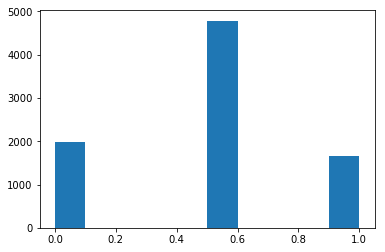

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.hist(scores, bins=10)

(array([ 11498.,   1494.,   1048.,    820.,    690.,    587.,    541.,
           450.,    441.,    386.,    404.,    340.,    363.,    324.,
           335.,    331.,    282.,    305.,    274.,    282.,    263.,
           297.,    304.,    286.,    291.,    270.,    312.,    262.,
           292.,    292.,    312.,    317.,    343.,    371.,    346.,
           399.,    399.,    440.,    458.,    478.,    481.,    504.,
           585.,    630.,    744.,    844.,   1019.,   1295.,   1843.,
         11958.]),
 array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
         0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
         0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,
         0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,
         0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,
         0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ]),
 <a list of 50 Patch objects>)

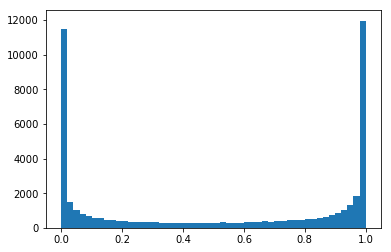

In [22]:
plt.hist(undefined, bins=50)

In [23]:
df = pd.DataFrame.from_dict(result)
df.to_csv('stack.csv', index=False, float_format='%.15f')
pd.read_csv('stack.csv').head()

,id,is_iceberg
0,5941774d,0.005641
1,4023181e,0.974324
2,b20200e4,0.000000
3,e7f018bb,1.000000
4,4371c8c3,0.966020
